# Data Science & Business Analytics Internship 

# Let's Grow More Internship Dec 22

### Task 1(2) Stock Market Prediction & Forecating Using Stacked LSTM

In [1]:
# Importing the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
data=pd.read_csv(r"C:/Users/user/Downloads/NSE-TATAGLOBAL.csv",encoding = 'ISO-8859-1')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
#converting date to Datatime format & sorting by Date
data.Date=pd.to_datetime(data.Date,dayfirst = True)
data=data.sort_values('Date',ascending=True)

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [8]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [72]:
data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<AxesSubplot:>

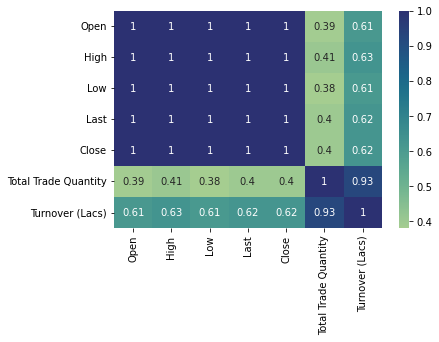

In [73]:
sns.heatmap(data.corr(),annot=True,cmap='crest')

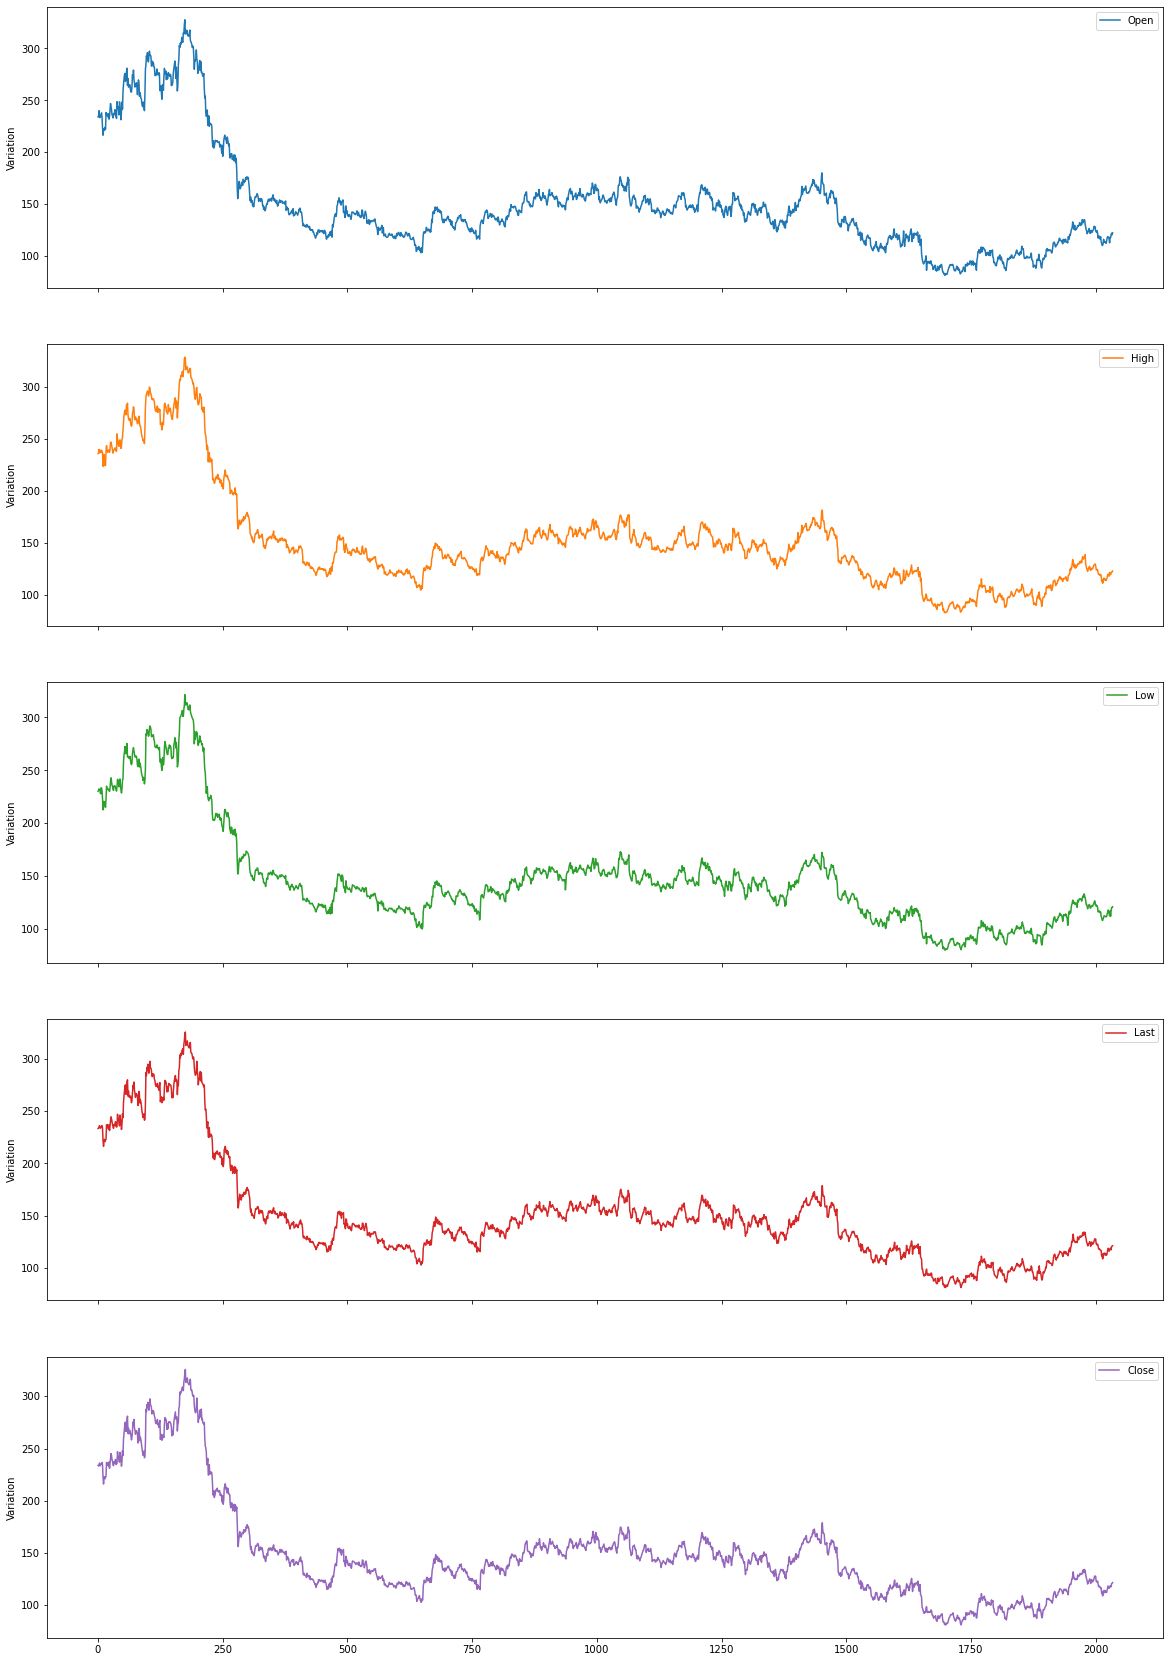

In [76]:
cols_plot=['Open','High','Low','Last','Close']
axes = data[cols_plot].plot(alpha = 1,figsize=(20,30),subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

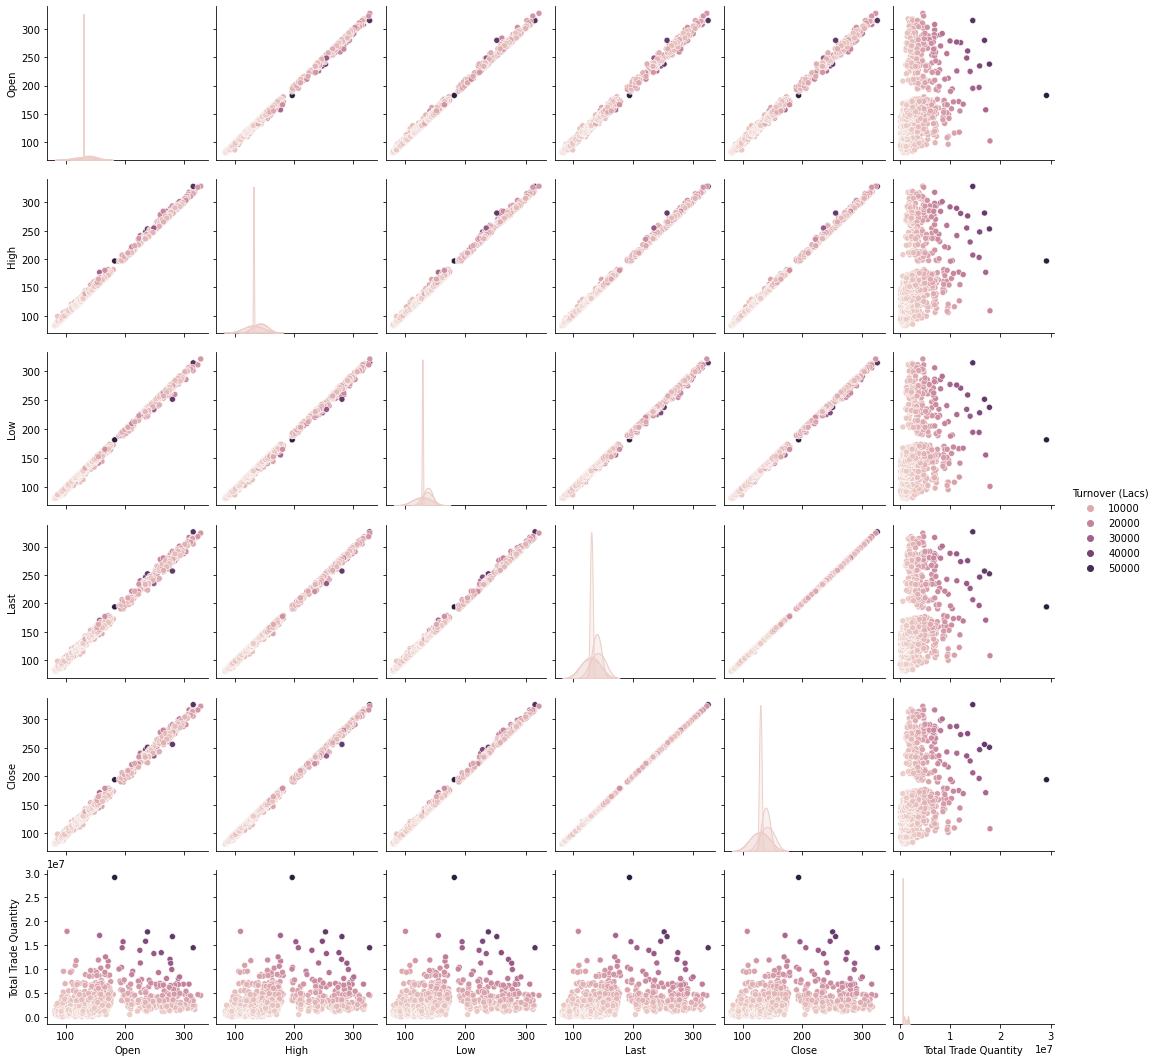

In [78]:
sns.pairplot(data,hue = 'Turnover (Lacs)')

In [9]:
data.columns 

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
# create target variable
data1=data.reset_index()['Close']

In [11]:
data1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

In [12]:
data1.tail()

2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, dtype: float64

In [13]:
data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

# Visualization

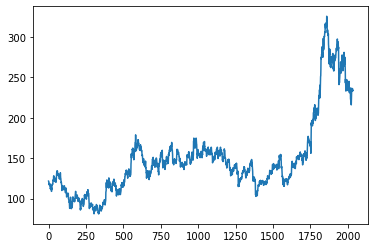

In [14]:
plt.plot(data1)

In [15]:
#Transform the value of Target variable between 1 and 1 for LSTM model
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler(feature_range=(0,1))
data1=Sc.fit_transform(np.array(data1).reshape(-1,1))

In [16]:
data1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
#Training & Testing 
training_size=int(len(data1)*0.65)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1):1]

In [18]:
training_size,test_size

(1322, 713)

###### converting an array values into dataset matrix 

In [19]:
def Create_dataset(dataset,time_step=1):
    dataX,dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX),np.array(dataY)

In [20]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100

X_train,y_train= Create_dataset(train_data,time_step)
X_test,y_test= Create_dataset (test_data,time_step)

In [21]:
print(X_train)

[[0.16584967 0.16319444 0.1621732  ... 0.14011438 0.13848039 0.12479575]
 [0.16319444 0.1621732  0.14971405 ... 0.13848039 0.12479575 0.12254902]
 [0.1621732  0.14971405 0.15400327 ... 0.12479575 0.12254902 0.13010621]
 ...
 [0.19669118 0.19505719 0.20996732 ... 0.20751634 0.20751634 0.19219771]
 [0.19505719 0.20996732 0.21098856 ... 0.20751634 0.19219771 0.18341503]
 [0.20996732 0.21098856 0.21568627 ... 0.19219771 0.18341503 0.19546569]]


In [22]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [23]:
#reshape input (samples,timestep,f eatures) required for LSTM Model
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


#### creating LSTM Model

In [79]:
#pip install --upgrade tensorflow

In [33]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [35]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [40]:
# create the Stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential()

model.add (LSTM(units=50,return_sequences =True,input_shape=(100,1)))
model.add(Dropout(0.2))


model.add (LSTM(units=50,return_sequences =True))
model.add(Dropout(0.2))

model.add (LSTM(units=50,return_sequences =True))
model.add(Dropout(0.2))

model.add (LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer = 'adam',loss='mean_squared_error')

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)


Epoch 1/50
39/39 [==============================] - 32s 350ms/step - loss: 0.0080 - val_loss: 0.0044
Epoch 2/50
39/39 [==============================] - 11s 283ms/step - loss: 0.0016 - val_loss: 0.0057
Epoch 3/50
39/39 [==============================] - 12s 300ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 4/50
39/39 [==============================] - 12s 314ms/step - loss: 0.0015 - val_loss: 0.0084
Epoch 5/50
39/39 [==============================] - 11s 287ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 6/50
39/39 [==============================] - 11s 287ms/step - loss: 0.0014 - val_loss: 0.0108
Epoch 7/50
39/39 [==============================] - 12s 310ms/step - loss: 0.0014 - val_loss: 0.0142
Epoch 8/50
39/39 [==============================] - 12s 315ms/step - loss: 0.0012 - val_loss: 0.0150
Epoch 9/50
39/39 [==============================] - 12s 300ms/step - loss: 0.0013 - val_loss: 0.0145
Epoch 10/50
39/39 [==============================] - 12s 303ms/step - loss: 0.0011 - val_lo

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 50)               

In [44]:
#lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 2s 76ms/step


In [46]:
# transformback to original for
train_predict=Sc.inverse_transform(train_predict)
test_predict=Sc.inverse_transform(test_predict)

In [47]:
#calculate RMSE performance metrics 
import math
from sklearn.metrics import mean_squared_error 
math.sqrt(mean_squared_error(y_train,train_predict))

133.2372340110077

In [48]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

191.31889901120996

<function matplotlib.pyplot.show(close=None, block=None)>

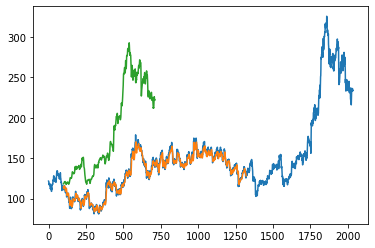

In [51]:
#plotting 
#shift train prediction for plotting 
look_back=100
trainPredictplot = np.empty_like(data1)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting 
look_back=100
testPredictplot = np.empty_like(data1)
testPredictplot[:,:] = np.nan
testPredictplot[look_back:len(test_predict)+look_back,:]=test_predict
#plot baseline and predictions
plt.plot(Sc.inverse_transform(data1))
plt.plot(trainPredictplot)
plt.plot(testPredictplot)
plt.show

In [52]:
len(test_data)

713

In [54]:
X_input=test_data[613:].reshape(1,-1)
X_input.shape

(1, 100)

In [57]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [58]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [62]:
# Demonstrate prediction for next days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.578

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [65]:
len(data1)

2035

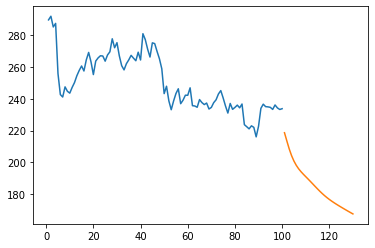

In [68]:
plt.plot(day_new,Sc.inverse_transform(data1[1935:]))
plt.plot(day_pred,Sc.inverse_transform(lst_output))

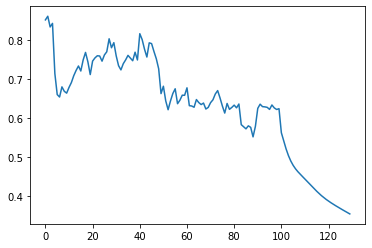

In [69]:
df2=data1.tolist()
df2.extend(lst_output)
plt.plot(df2[1935:])

In [70]:
df2=Sc.inverse_transform(df2).tolist()

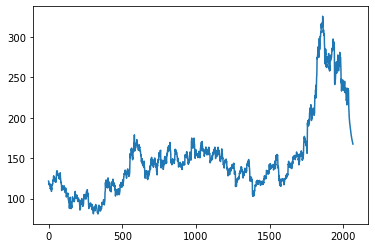

In [71]:
plt.plot(df2)

# Thank You !!